# Prediction on Credit Risk

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. 

A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.


# 1. Data Preparation

## Import Data

In [1]:
import pandas as pd
df = pd.read_csv("german_credit.csv")
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [3]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

## Attribute Type


- creditability: nominal (binary)
- Account Balance: nominal
- Duration of Credit: quantitative (discrete)
- Payment Status of Previous Credit: ordinal
- Purpose: nominal
- Credit Amount: quantitative (continuous)
- Value savings/Stocks: nominal
- Length of current employment: ordinal
- Instalment percent: quantitative(discrete)
- Sex & Martial Status:nominal
- Guarantors: nominal
- Duration in Current address: nominal  
- Most valuable available asset: quantititative (discrete)
- Age (years): quantititative ( it is a continuous variable but here all values are in whole numbers)
- Concurrent Credits: quantititative (discrete)
- Type of apartment: nominal
- No of Credits at this Bank: quantititative (discrete)
- Occupation: ordinal
- No of dependents: quantititative (discrete)
- Telephone: nominal
- Foreign Worker: Binary (Binary variables are nominal variables which have only two categories or levels).

## Detect Missing Values

In [5]:
df.isnull().sum().sort_values(ascending=False)

Foreign Worker                       0
Sex & Marital Status                 0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Guarantors                           0
Telephone                            0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Creditability                        0
dtype: int64

## Check Categorical Variables by using Frequency Distribution Table

In [6]:
pd.crosstab(index=df['Creditability'], columns='count')

col_0,count
Creditability,
0,300
1,700


In [7]:
pd.crosstab(index=df['Account Balance'], columns='count')

col_0,count
Account Balance,
1,274
2,269
3,63
4,394


In [8]:

pd.crosstab(index=df['Payment Status of Previous Credit'], columns='count')

col_0,count
Payment Status of Previous Credit,
0,40
1,49
2,530
3,88
4,293


In [9]:
pd.crosstab(index=df['Duration of Credit (month)'], columns='count')

col_0,count
Duration of Credit (month),
4,6
5,1
6,75
7,5
8,7
9,49
10,28
11,9
12,179


In [10]:
pd.crosstab(index=df['Purpose'], columns='count')

col_0,count
Purpose,
0,234
1,103
2,181
3,280
4,12
5,22
6,50
8,9
9,97


In [11]:
pd.crosstab(index=df['Value Savings/Stocks'], columns='count')

col_0,count
Value Savings/Stocks,
1,603
2,103
3,63
4,48
5,183


In [12]:
pd.crosstab(index=df['Length of current employment'], columns='count')

col_0,count
Length of current employment,
1,62
2,172
3,339
4,174
5,253


In [13]:
pd.crosstab(index=df['Instalment per cent'], columns='count')

col_0,count
Instalment per cent,
1,136
2,231
3,157
4,476


In [14]:
pd.crosstab(index=df['Sex & Marital Status'], columns='count')

col_0,count
Sex & Marital Status,
1,50
2,310
3,548
4,92


In [15]:
pd.crosstab(index=df['Guarantors'], columns='count')

col_0,count
Guarantors,
1,907
2,41
3,52


In [16]:
pd.crosstab(index=df['Duration in Current address'], columns='count')

col_0,count
Duration in Current address,
1,130
2,308
3,149
4,413


In [17]:
pd.crosstab(index=df['Most valuable available asset'], columns='count')

col_0,count
Most valuable available asset,
1,282
2,232
3,332
4,154


In [18]:
pd.crosstab(index=df['Concurrent Credits'], columns='count')

col_0,count
Concurrent Credits,
1,139
2,47
3,814


In [19]:
pd.crosstab(index=df['Type of apartment'], columns='count')

col_0,count
Type of apartment,
1,179
2,714
3,107


In [20]:
pd.crosstab(index=df['No of Credits at this Bank'], columns='count')

col_0,count
No of Credits at this Bank,
1,633
2,333
3,28
4,6


In [21]:
pd.crosstab(index=df['Occupation'], columns='count')

col_0,count
Occupation,
1,22
2,200
3,630
4,148


In [22]:
pd.crosstab(index=df['No of dependents'], columns='count')

col_0,count
No of dependents,
1,845
2,155


In [23]:
pd.crosstab(index=df['Telephone'], columns='count')

col_0,count
Telephone,
1,596
2,404


In [24]:
pd.crosstab(index=df['Foreign Worker'], columns='count')

col_0,count
Foreign Worker,
1,963
2,37


## Detect Outliers on Continuous Variables
 - Duration of Credit (month)
 - Credit Amount
 - Age (years)

In [25]:
#function to detect outliers in a dataset using Z score
import numpy as np
import pandas as pd

def detect_outlier(data_1):
    outliers1=[]
    threshold= 3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers1.append(y)
    if outliers1 == []:
      print("There are no outliers by checking z-score.")
    else: return outliers1   

In [26]:
#function to detect outliers in a dataset using IQR method
import numpy as np 
import pandas as pd

def detect_outlier2(data_1):
    outliers2=[]
    #sorted(data_1)
    q1, q3= np.percentile(sorted(data_1),[25,75])
    iqr=q3-q1
    #print ('iqr,q1,q3', iqr,q1,q3)
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print('lower_bound =', lower_bound, 'upper_bound =', upper_bound)
    for y in data_1:
        if (y < lower_bound or y > upper_bound):
            outliers2.append(y)
    if outliers2 == []:
      print("There are no outliers by checking IQR.")
    else: return outliers2 

In [27]:
#detect outliers on 'Duration of Credit (month)'
data_variable03= df.loc[:,'Duration of Credit (month)']
outlier_datapoints03 = detect_outlier(data_variable03)
print(outlier_datapoints03)
outlier_datapoints031 = detect_outlier2(data_variable03)
print(outlier_datapoints031)

[60, 60, 60, 60, 60, 60, 72, 60, 60, 60, 60, 60, 60, 60]
lower_bound = -6.0 upper_bound = 42.0
[48, 48, 48, 48, 48, 48, 48, 48, 47, 48, 60, 54, 48, 48, 60, 48, 60, 48, 48, 60, 48, 48, 48, 48, 48, 48, 60, 60, 45, 48, 48, 48, 72, 48, 60, 60, 48, 60, 60, 48, 60, 48, 48, 48, 60, 45, 48, 48, 48, 48, 48, 48, 48, 60, 48, 48, 48, 48, 48, 48, 45, 48, 54, 48, 45, 48, 45, 48, 48, 48]


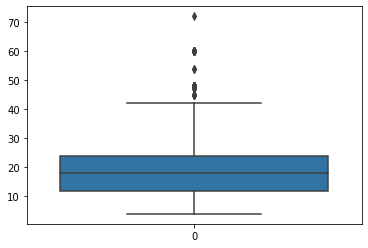

In [28]:
#detect outliers on 'Duration of Credit (month)' by using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['Duration of Credit (month)'])

In [29]:
#detect outliers on 'Credit Amount'
data_variable06= df.loc[:,'Credit Amount']
outlier_datapoints06 = detect_outlier(data_variable06)
print(outlier_datapoints06)
outlier_datapoints061 = detect_outlier2(data_variable06)
print(outlier_datapoints061)

[12749, 12169, 13756, 11760, 14179, 12204, 15857, 15653, 14555, 14318, 15672, 11938, 14782, 12612, 14027, 12976, 14421, 12389, 15945, 11816, 11998, 18424, 14896, 12579, 12680]
lower_bound = -2544.625 upper_bound = 7882.375
[10875, 8858, 12749, 8072, 8487, 12169, 10722, 8613, 8588, 10366, 8133, 9436, 10477, 13756, 11760, 14179, 10974, 9566, 8358, 9857, 10222, 9055, 7966, 12204, 8229, 10623, 9277, 15857, 10144, 15653, 8335, 8471, 8947, 11054, 9157, 9283, 14555, 9271, 8386, 14318, 15672, 10961, 7980, 11560, 11328, 11938, 14782, 12612, 9398, 9572, 8065, 9034, 14027, 9629, 12976, 10297, 14421, 8086, 10127, 12389, 11590, 15945, 9960, 8648, 8318, 11816, 11998, 18424, 14896, 8978, 12579, 12680]


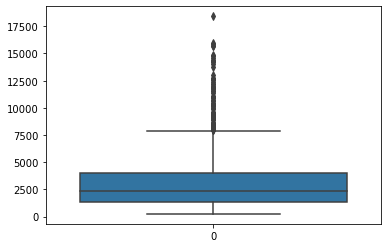

In [30]:
#detect outliers on 'Credit Amount' by using boxplot
sns.boxplot(data=df['Credit Amount'])

In [31]:

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold



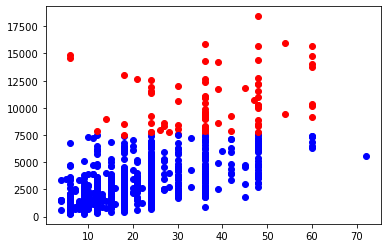

In [32]:
#detect outliers on 'Duration of Credit (month)' and 'Credit Amount' by using scatter plot
mu, sigma, min_threshold, max_threshold = estimate_gaussian(df['Credit Amount'].values)

xs = df['Duration of Credit (month)']
ys = df['Credit Amount']

for x, y in zip(xs, ys):
    color = 'blue'  # non-outlier color
    if not min_threshold <= y <= max_threshold:  # condition for being an outlier
        color = 'red'  # outlier color
    plt.scatter(x, y, color=color)
plt.show()

In [33]:
#detect outliers on 'Age(years)'
data_variable14= df.loc[:,'Age (years)']
outlier_datapoints141 = detect_outlier(data_variable14)
#print(data_variable14)
#sorted (outlier_datapoints141)
print('outliers using z-score \n', sorted (outlier_datapoints141))
outlier_datapoints14 = detect_outlier2(data_variable14)
#print(data_variable14)
print('outliers using IQR \n', sorted (outlier_datapoints14))

outliers using z-score 
 [70, 74, 74, 74, 74, 75, 75]
lower_bound = 4.5 upper_bound = 64.5
outliers using IQR 
 [65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 68, 68, 68, 70, 74, 74, 74, 74, 75, 75]


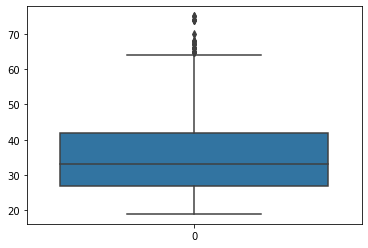

In [34]:
#detect outliers on 'Age(years)' by using boxplot
sns.boxplot(data=df['Age (years)'])

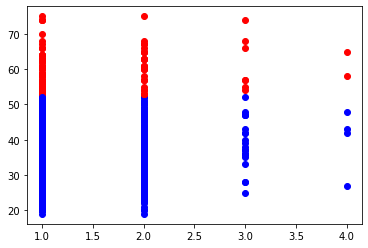

In [35]:
mu, sigma, min_threshold, max_threshold = estimate_gaussian(df['Age (years)'].values)

xs = df['No of Credits at this Bank']
ys = df['Age (years)']

for x, y in zip(xs, ys):
    color = 'blue'  # non-outlier color
    if not min_threshold <= y <= max_threshold:  # condition for being an outlier
        color = 'red'  # outlier color
    plt.scatter(x, y, color=color)
plt.show()

# 2. Exploratory Data Analysis

## Distribution of variables with numerical values - plotting histograms
- Duration of Credit (month)
- Credit Amount
- Instalment percent
- Age (years)
- No of Credits at this Bank:
- No of dependents

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Duration of Credit (month)')]

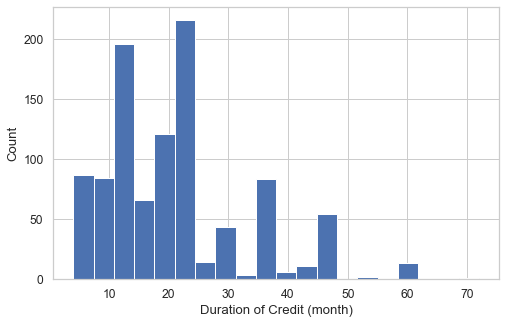

In [36]:
import seaborn as sns
# Distribution of 'Duration of Credit (month)'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Duration of Credit (month)'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Duration of Credit (month)', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Credit Amount')]

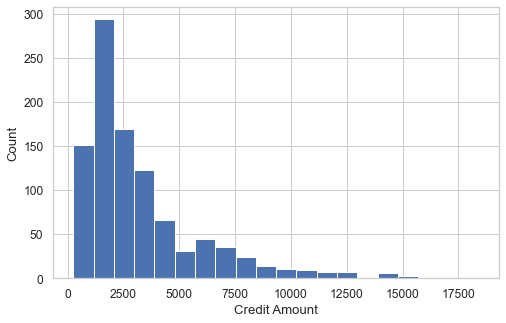

In [37]:
# Distribution of 'Credit Amount'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Credit Amount'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Credit Amount', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Instalment percent')]

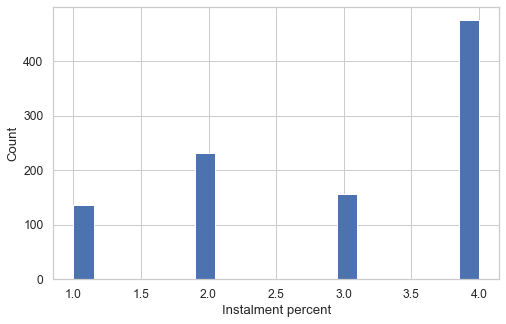

In [38]:
# Distribution of 'Instalment percent'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Instalment per cent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Instalment percent', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age (years)')]

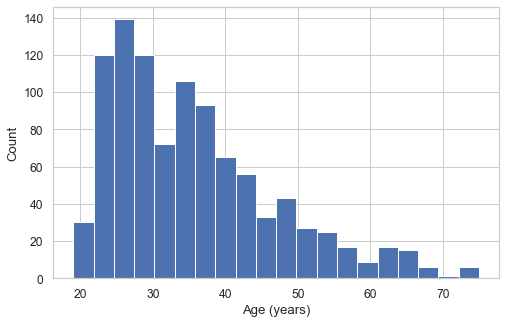

In [39]:
# Distribution of 'Age (years)'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Age (years)'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age (years)', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'No of Credits at this Bank')]

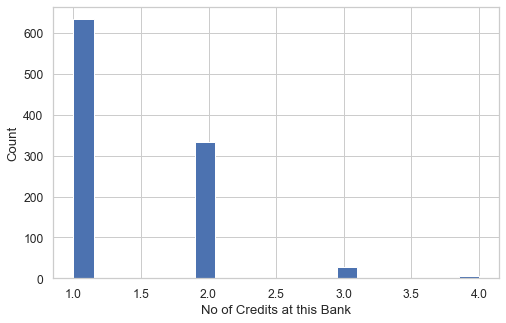

In [40]:
# Distribution of ''No of Credits at this Bank'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['No of Credits at this Bank'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='No of Credits at this Bank', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'No of dependents')]

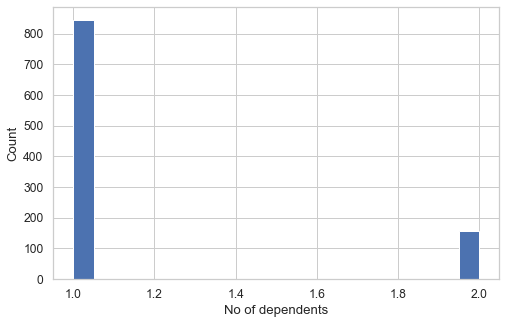

In [41]:
# Distribution of 'No of dependents'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['No of dependents'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='No of dependents', ylabel='Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3730DA30>,
      dtype=object)

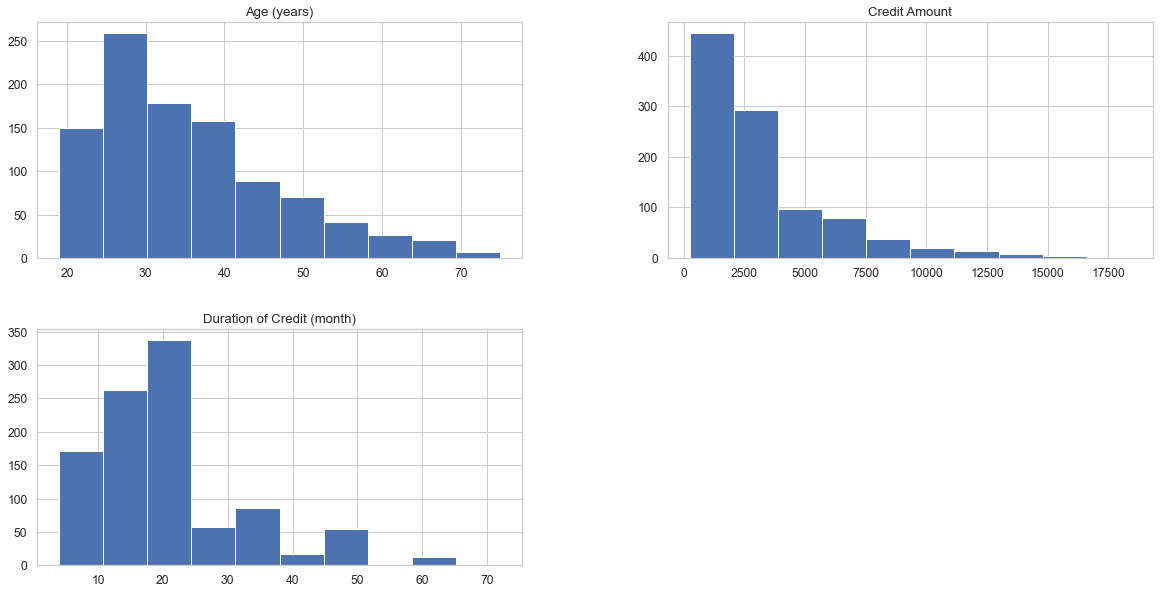

In [42]:
df.hist(['Age (years)', 'Credit Amount','Duration of Credit (month)'], figsize=(20,10))

**Here these histograms show Slightly skewed distribution for Age, Credit Amount and Duration of credit,**

## Analyze correlation between independent variables and targeted variable - 'Creditability'.

**Feature Selection**
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

**Visual exploration of relationship between variables**


*   Continuous Vs Continuous ---- Scatter Plot
*   Categorical Vs Continuous---- Box Plot
*  Categorical Vs Categorical---- Grouped Bar Plots




**Statistical measurement of relationship strength between variables**


*   Continuous Vs Continuous ---- Correlation matrix
*   Categorical Vs Continuous---- ANOVA test
*   Categorical Vs Categorical--- Chi-Square test






In this case study the Target variable is categorical, hence below two scenarios will be present

**Categorical Target Variable Vs Continuous Predictor**
**Categorical Target Variable Vs Categorical Predicto**

### Relationship Exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

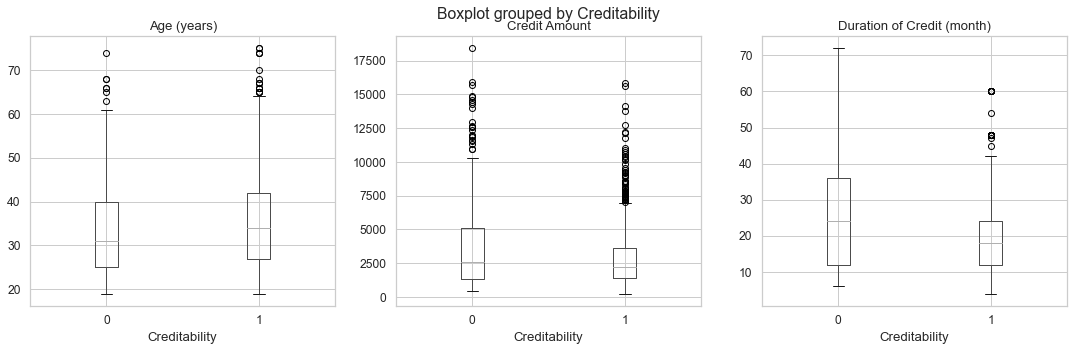

In [43]:
# Box plots for Categorical Target Variable "Credibility" and continuous predictors
ContinuousColsList=['Age (years)','Credit Amount', 'Duration of Credit (month)']
import matplotlib.pyplot as plt

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Creditability',  figsize=(5,5), vert=True, ax=PlotCanvas[i])


**Box-Plots interpretation**
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "Age (years)" Vs "Creditability". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the Creditability.

The other other two charts also exhibit opposite characteristics, hence "Credit Amountt" and "Duration of Credit (month)" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

**Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [44]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [45]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age (years)','Credit Amount', 'Duration of Credit (month)']
FunctionAnova(inpData=df, TargetVariable='Creditability', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age (years) is correlated with Creditability | P-Value: 0.003868455281308189
Credit Amount is correlated with Creditability | P-Value: 8.795399017206301e-07
Duration of Credit (month) is correlated with Creditability | P-Value: 6.488049877187189e-12


['Age (years)', 'Credit Amount', 'Duration of Credit (month)']

The results of ANOVA confirm our visual analysis using box plots above!

Notice the P-Value of "Age (years)", it is just at the boundry of the threshold. This is something we already doubted in the box plots section already.

While the other two P-Values are clearly zero, hence they are correlated without doubt.

All three columns are correlated with Creditability.

### Relationship Exploration: Categorical Vs Categorical -- Histrogram

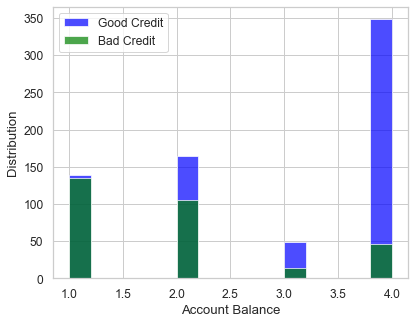

In [46]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Account Balance'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Account Balance'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Account Balance')
plt.legend()

plt.show()

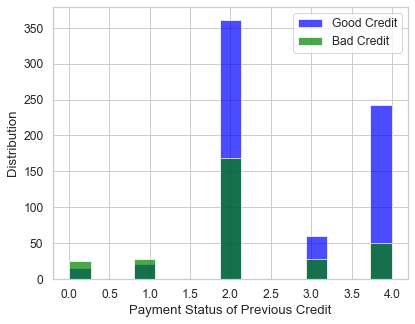

In [47]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Payment Status of Previous Credit'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Payment Status of Previous Credit'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Payment Status of Previous Credit')
plt.legend()

plt.show()

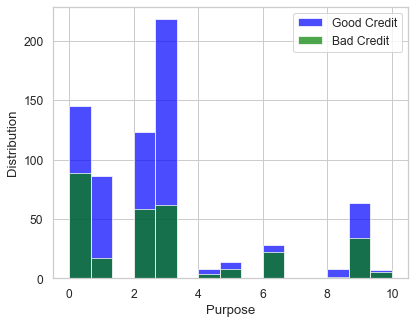

In [48]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Purpose'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Purpose'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Purpose')
plt.legend()

plt.show()

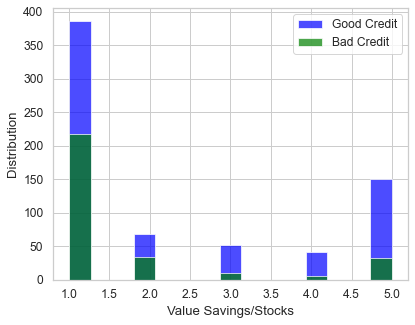

In [49]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Value Savings/Stocks'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Value Savings/Stocks'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Value Savings/Stocks')
plt.legend()

plt.show()

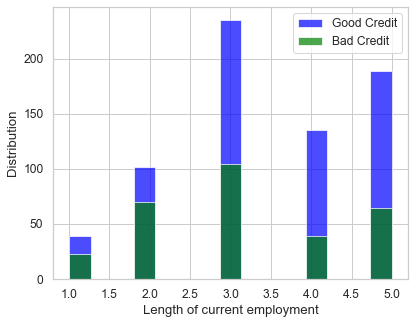

In [50]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Length of current employment'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Length of current employment'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Length of current employment')
plt.legend()

plt.show()

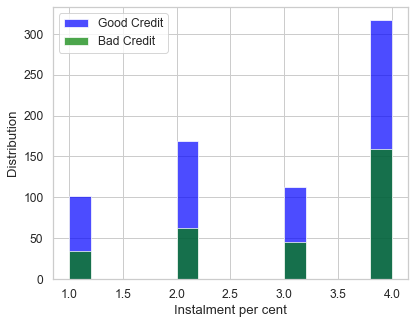

In [51]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Instalment per cent'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Instalment per cent'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Instalment per cent')
plt.legend()

plt.show()

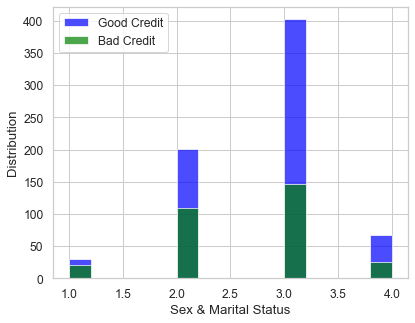

In [52]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Sex & Marital Status'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Sex & Marital Status'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Sex & Marital Status')
plt.legend()

plt.show()

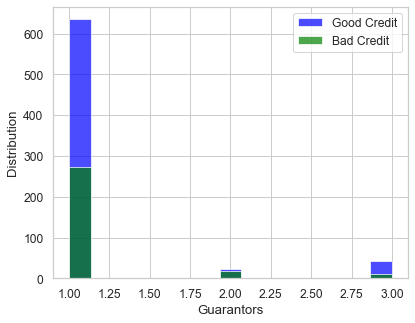

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Guarantors'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Guarantors'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Guarantors')
plt.legend()

plt.show()

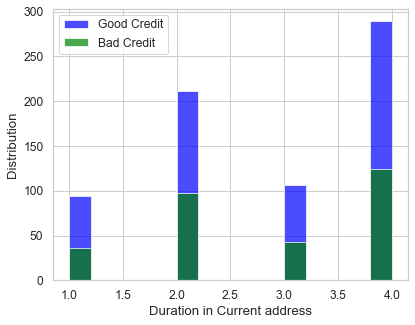

In [54]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Duration in Current address'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Duration in Current address'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Duration in Current address')
plt.legend()

plt.show()

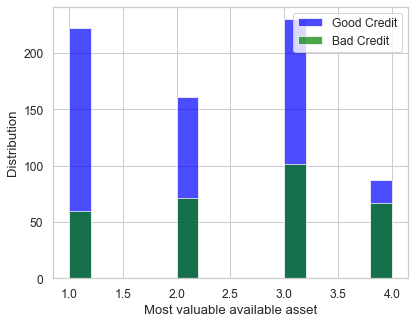

In [55]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Most valuable available asset'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Most valuable available asset'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Most valuable available asset')
plt.legend()

plt.show()

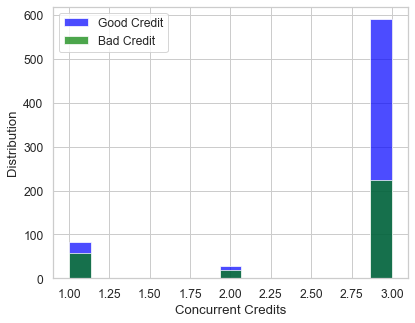

In [56]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Concurrent Credits'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Concurrent Credits'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Concurrent Credits')
plt.legend()

plt.show()

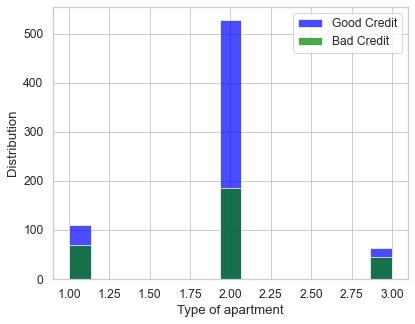

In [57]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Type of apartment'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Type of apartment'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Type of apartment')
plt.legend()

plt.show()

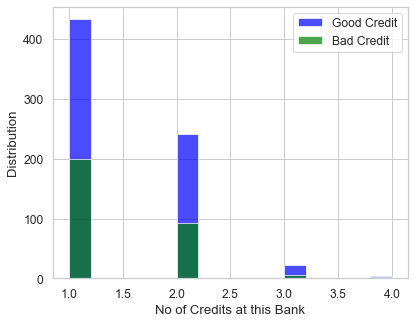

In [58]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['No of Credits at this Bank'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['No of Credits at this Bank'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('No of Credits at this Bank')
plt.legend()

plt.show()

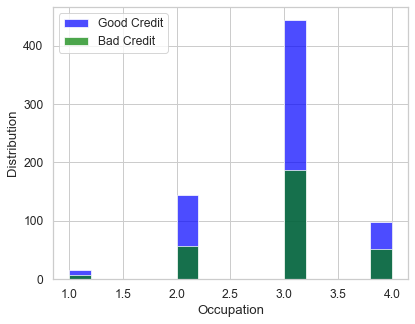

In [59]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Occupation'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Occupation'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Occupation')
plt.legend()

plt.show()

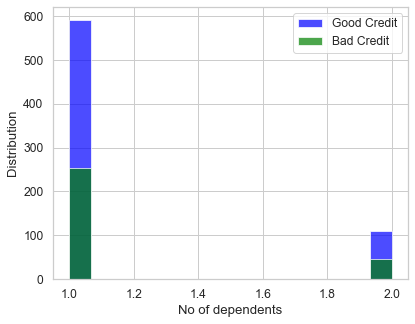

In [60]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['No of dependents'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['No of dependents'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('No of dependents')
plt.legend()

plt.show()

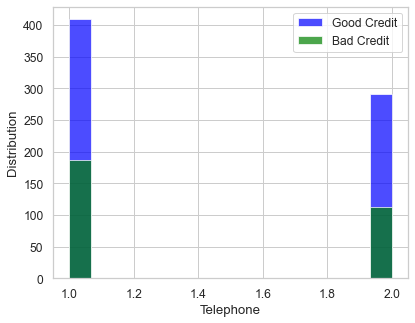

In [61]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Telephone'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Telephone'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Telephone')
plt.legend()

plt.show()

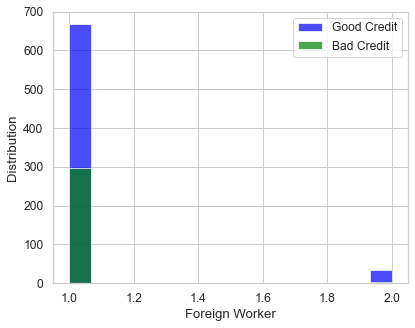

In [62]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['Foreign Worker'][df['Creditability'] == 1], bins=15, alpha = 0.7, label = 'Good Credit',color="blue")
plt.hist(df['Foreign Worker'][df['Creditability'] == 0], bins=15, alpha = 0.7, label = 'Bad Credit',color="green")
plt.ylabel('Distribution')
plt.xlabel('Foreign Worker')
plt.legend()

plt.show()

**Selection of Attributes:**
According to the histogram of correlations between the independent (categorical) and dependent (categorical) variables, several variables have an effect on the target class. For example, as they change between groups, the ratio of "bad credit" to "good credit" changes accordingly. They are considered to have a strong correlation with the target.

- Account Balance
- Payment Status of Previous Credit
- Purpose
- Value Savings/Stocks
- Length of current employment
- Sex & Marital Status
- Guarantors
- Concurrent Credits
- Type of apartment
- Occupation
- Foreign Worker

Together with 'Age(year)', 'Credit Amount', and 'Duration of Credit (month)', these variables are the selected features for following steps.


### Target Varialbe Analysis

In [63]:
pd.crosstab(index=df['Creditability'], columns='count')

col_0,count
Creditability,
0,300
1,700


- The class distribution is slightly imbalanced (3:7). We don't need to deal with it.
- There are no missing values in this dataset.
- 'Credit Amount' and 'Age(years)' are highly skewed, which need to be transformed.
- 'Duration of Credit(month)' has several groups with less number, it needs to be discretized.

# 3. Data Transformation 
on 'Credit Amount' , 'Age(years)' and 'Duration of Credit(month)'


**Log transformation**
A log transformation can help to fit a very skewed distribution into a Gaussian one. After log transformation we can easily see pattern in our data.


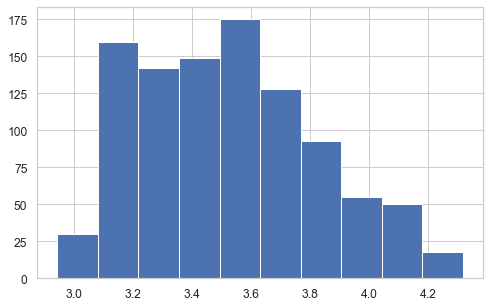

In [64]:
import numpy as np
import matplotlib.pyplot as plt
df["Age (years)"].apply(np.log).hist()
plt.show()

We can aslo try using **Square Root Transformation.**, **Reciprocal Transformation** and **Boxcox Transformation.** Since Age variable stll has skewed distribution after applying log transfrmation.

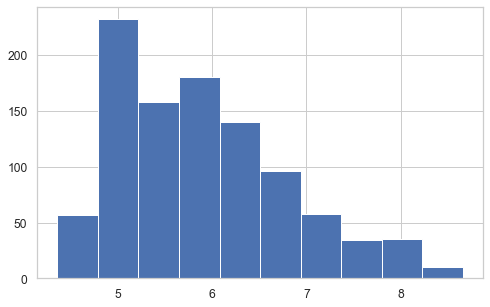

In [65]:
df["Age (years)"].apply(np.sqrt).hist()

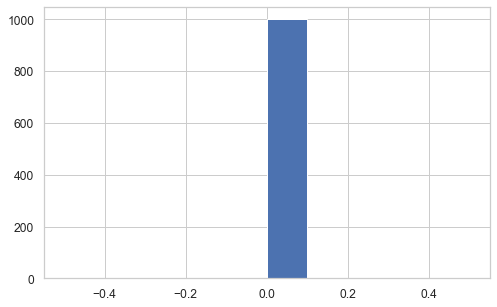

In [66]:
df["Age (years)"].apply(np.reciprocal).hist()

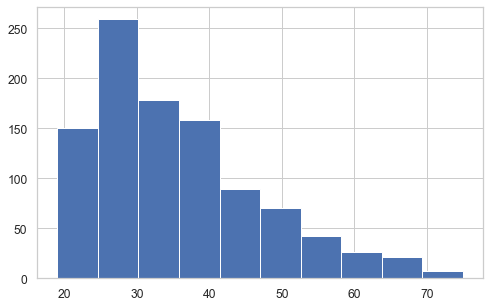

In [67]:
from numpy import exp
from scipy.stats import boxcox
import matplotlib.pyplot as plt
# transform to be exponential
data = exp(df["Age (years)"])
# power transform
data = boxcox(data, 0)
plt.hist(data)
plt.show()

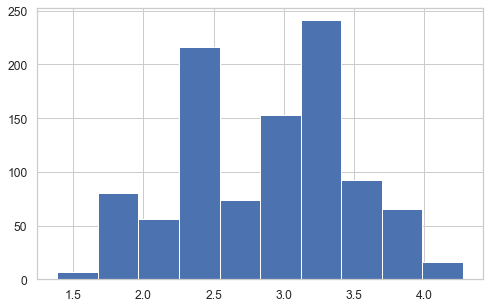

In [68]:
df["Duration of Credit (month)"].apply(np.log).hist()
plt.show()

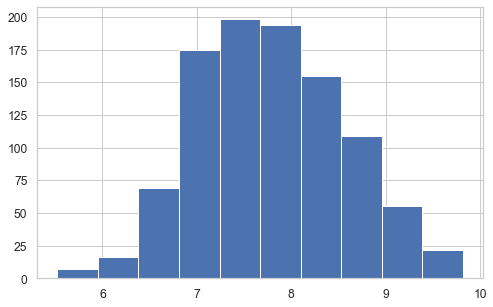

In [69]:
df["Credit Amount"].apply(np.log).hist()
plt.show()

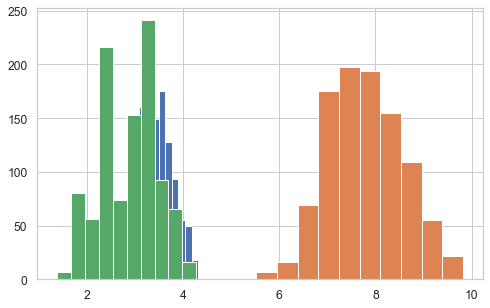

In [70]:
import numpy as np
import matplotlib.pyplot as plt
df["Age (years)"].apply(np.log).hist()
df["Credit Amount"].apply(np.log).hist()
df["Duration of Credit (month)"].apply(np.log).hist()
plt.show()

In [71]:
# create new variables after transformation
df["Age_new"] = df["Age (years)"].apply(np.log)
df["CreditAmount_new"] = df["Credit Amount"].apply(np.log)
df["DurationCredit_new"] = df["Duration of Credit (month)"].apply(np.log)

In [72]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Creditability,-0.874183,-1.238284
Account Balance,0.006957,-1.663703
Duration of Credit (month),1.094184,0.919781
Payment Status of Previous Credit,-0.011886,-0.579056
Purpose,1.178887,0.554083
Credit Amount,1.949594,4.292481
Value Savings/Stocks,1.016677,-0.680224
Length of current employment,-0.117615,-0.934331
Instalment per cent,-0.531348,-1.210473
Sex & Marital Status,-0.305146,-0.002567


As rule of thumb, skewness can be interpreted like this
	                     
Fairly Symmetrical,	  if Skewness is   -0.5 to 0.5, 
Moderate Skewed,	   if Skewness is    -0.5 to -1.0 and 0.5 to 1.0
Highly Skewed    if Skewness is     	< -1.0 and > 1.0

After transformation, the skewness of three variables have been largely reduced to Fairly Symmetrical range. 

# 4. Data Modeling

The target variable is a binary classfication. So we choose Decision Tree, Naive Bayes, Random Forest, Support Vector, Gradient Boosting classification models to train the data. Then compare the results of each models. 









## Training Models on Original Dataset
Since Decison Tree and Naive Bayes are not sensitive with whether Normal  distrubition. We first use the original data before transformation for training models.

In [73]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

###  Decision Tree
Setting max depth of the tree to 5.

In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [76]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=('1', '0'), filled=True)
# Plot tree
graph = graphviz.Source(dot_data) 
graph
graph.render()

class Names [1 0]


'Source.gv.pdf'

In [77]:
# Let's make the predictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [78]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  9 200]]
TP:  200 , FP:  62 , TN:  29 , FN: 9


In [79]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.76       300
   macro avg       0.76      0.64      0.65       300
weighted avg       0.76      0.76      0.73       300



### Naive Bayes

In a similar way, we can train and test Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [81]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 24


Let's understand our Naive Bayes model

In [82]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  23
Classes  [0 1]
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66410755 -5.09646277 -7.53277155 -7.24784051 -0.02742556 -7.77533319
  -7.17149184 -7.18692424 -7.34679368 -8.16827203 -7.27634202 -7.36521041
  -4.7763848  -7.37830695 -7.66410755 -7.99010849 -7.23470403 -8.16827203
  -7.9797457  -8.28709295 -7.06050968 -6.23899767 -7.19171515]
 [-6.96837847 -5.09474647 -7.03722129 -7.03049229 -0.03551118 -7.19978435
  -6.80170153 -6.96348848 -7.02900309 -7.89735436 -7.00112161 -7.22119462
  -4.44781721 -7.03273027 -7.37069727 -7.6643307  -6.96907899 -7.89204931
  -7.69282266 -7.98630185 -6.77054275 -5.98902706 -7.01052992]]


In [83]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.42      0.41        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.64      0.63      0.63       300



### Random Forest Classification

In [84]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0,max_depth=10, min_samples_split=10, n_estimators=35, n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [85]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7514285714285714

Testing Accuracy: 0.7666666666666667

Sensitivity 0.6909090909090909

Specificity 0.7836734693877551

F1 Score: 0.8458149779735683

AUC Score: 0.6681213523318785

Confusion Matrix:
 [[ 38  53]
 [ 17 192]]


In [86]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52        91
           1       0.78      0.92      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.67      0.68       300
weighted avg       0.76      0.77      0.75       300



### Support Vector Classifier Model

In [87]:
from sklearn.svm import SVC

model2=SVC(kernel='rbf', random_state=0, C=40, gamma='auto')
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [88]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model2,X=X_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7

Testing Accuracy: 0.6933333333333334

Sensitivity 0.0

Specificity 0.6956521739130435

F1 Score: 0.8188976377952757

AUC Score: 0.49760765550239233

Confusion Matrix:
 [[  0  91]
 [  1 208]]


In [89]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.70      1.00      0.82       209

    accuracy                           0.69       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.48      0.69      0.57       300



### Gradient Boosting Classification

In [90]:
# GradientBoosting Classification

from sklearn.ensemble import GradientBoostingClassifier

model3=GradientBoostingClassifier(random_state=0,max_depth=12, min_samples_split=13, n_estimators=30)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [91]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model3,X=X_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7457142857142858

Testing Accuracy: 0.73

Sensitivity 0.5675675675675675

Specificity 0.7831858407079646

F1 Score: 0.8137931034482757

AUC Score: 0.6542142068457858

Confusion Matrix:
 [[ 42  49]
 [ 32 177]]


In [92]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        91
           1       0.78      0.85      0.81       209

    accuracy                           0.73       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



## Training models after Feature Selection
After performing exploratory analysis and determining the features or which can be selected as a subset of data frame. 

In [93]:
# create subset dataframe for Decision Tree by using selected variables which are not tranformed. 
df_select = df[['Creditability','Account Balance','Payment Status of Previous Credit','Purpose','Value Savings/Stocks','Length of current employment','Sex & Marital Status','Guarantors','Concurrent Credits','Type of apartment','Occupation','Foreign Worker','Age (years)','Credit Amount','Duration of Credit (month)']]
df_select.head(10)

,Creditability,Account Balance,Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Sex & Marital Status,Guarantors,Concurrent Credits,Type of apartment,Occupation,Foreign Worker,Age (years),Credit Amount,Duration of Credit (month)
0,1,1,4,2,1,2,2,1,3,1,3,1,21,1049,18
1,1,1,4,0,1,3,3,1,3,1,3,1,36,2799,9
2,1,2,2,9,2,4,2,1,3,1,2,1,23,841,12
3,1,1,4,0,1,3,3,1,3,1,2,2,39,2122,12
4,1,1,4,0,1,3,3,1,1,2,2,2,38,2171,12
5,1,1,4,0,1,2,3,1,3,1,2,2,48,2241,10
6,1,1,4,0,1,4,3,1,3,2,2,2,39,3398,8
7,1,1,4,0,1,2,3,1,3,2,2,2,40,1361,6
8,1,4,4,3,1,1,2,1,3,2,1,1,65,1098,18
9,1,2,2,3,3,1,2,1,3,1,1,1,23,3758,24


In [94]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names_s=df_select.columns[df_select.columns != class_col_name ]
# 70% training and 30% test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_select.loc[:, feature_names_s], df_select[class_col_name], test_size=0.3,random_state=1) 

### Decision Tree

In [95]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_s, y_train_s)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [96]:
import graphviz
#Get unique class values to display on the tree
class_values=df_select[class_col_name].unique()
print ("class Names",class_values)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_s,  class_names=('1', '0'), filled=True)
# Plot tree
graph = graphviz.Source(dot_data) 
graph
graph.render()

class Names [1 0]


'Source.gv.pdf'

In [97]:
# Let's make the predictions on the test set  that we set aside earlier using the trained tree
y_pred_s = clf.predict(X_test_s)


In [98]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test_s, y_pred_s)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 33  58]
 [ 16 193]]
TP:  193 , FP:  58 , TN:  33 , FN: 16


In [99]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        91
           1       0.77      0.92      0.84       209

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.66       300
weighted avg       0.74      0.75      0.73       300



### Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train_s, y_train_s)

#Predict the response for test dataset
y_pred_s = nb.predict(X_test_s)

In [101]:
print ("Total Columns (including class)",len(df_select.columns))

Total Columns (including class) 15


In [102]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  14
Classes  [0 1]
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.65747702 -7.52614102 -7.24120998 -7.76870266 -7.16486131 -7.34016315
  -8.1616415  -7.37167642 -7.65747702 -7.2280735  -8.28046242 -4.76975427
  -0.02079503 -5.08983224]
 [-6.95990049 -7.02874331 -7.02201431 -7.19130637 -6.79322355 -7.02052511
  -7.88887638 -7.02425228 -7.36221929 -6.96060101 -7.97782386 -4.43933923
  -0.0270332  -5.08626848]]


In [103]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test_s, y_pred_s))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



### Random Forest Classification model

In [104]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0,max_depth=10, min_samples_split=10, n_estimators=35, n_jobs=-1)
model.fit(X_train_s,y_train_s)
y_pred_s=model.predict(X_test_s)

In [105]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model,X=X_train_s,y=y_train_s,cv=10)
cm=confusion_matrix(y_test_s,y_pred_s)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test_s,y_pred_s)
f1=f1_score(y_test_s,y_pred_s,average='binary')
auc=roc_auc_score(y_test_s,y_pred_s)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7542857142857142

Testing Accuracy: 0.7633333333333333

Sensitivity 0.6923076923076923

Specificity 0.7782258064516129

F1 Score: 0.8446389496717723

AUC Score: 0.6595246858404753

Confusion Matrix:
 [[ 36  55]
 [ 16 193]]


In [106]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        91
           1       0.78      0.85      0.81       209

    accuracy                           0.73       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



### Gradient Boosting Classification

In [107]:
# GradientBoosting Classification

from sklearn.ensemble import GradientBoostingClassifier

model3=GradientBoostingClassifier(random_state=0,max_depth=12, min_samples_split=13, n_estimators=30)
model3.fit(X_train_s,y_train_s)
y_pred_s=model3.predict(X_test_s)

In [108]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model3,X=X_train_s,y=y_train_s,cv=10)
cm=confusion_matrix(y_test_s,y_pred_s)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test_s,y_pred_s)
f1=f1_score(y_test_s,y_pred_s,average='binary')
auc=roc_auc_score(y_test_s,y_pred_s)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7414285714285714

Testing Accuracy: 0.7633333333333333

Sensitivity 0.6515151515151515

Specificity 0.7948717948717948

F1 Score: 0.8397291196388262

AUC Score: 0.6812398128187602

Confusion Matrix:
 [[ 43  48]
 [ 23 186]]


In [109]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        91
           1       0.78      0.85      0.81       209

    accuracy                           0.73       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



# Conclusion

By comparing the confusion matrix of these models, we can conclude that Decision Tree with original dataset outperforms the other models.  After feature selection, only Random Forest and Super Vector Machine slightly improve the results, while Decision Tree has poorer predictions and Naïve Bayes has no change.

In General, most of the classification models are not sensitive to the distribution of continuous variables. So we can use the data before transformation in this scenario. 

Our recommended priority classification method is the Decision Tree, which is simple, straightforward and insensitive to feature selection, and also has the best performance.

Li Gong & Bushra Bashir